In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
path_to_file_convertion = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-tolstihin/conversion.csv'

In [4]:
df = pd.read_csv(path_to_file_convertion , sep = ',')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [5]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
df.ad_id.nunique()

1143

In [15]:
df0 = df.groupby(['fb_campaign_id'], as_index = False) \
    .agg({'Impressions':'sum'})
df0.Impressions = np.log(df0.Impressions)

In [16]:
df0

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


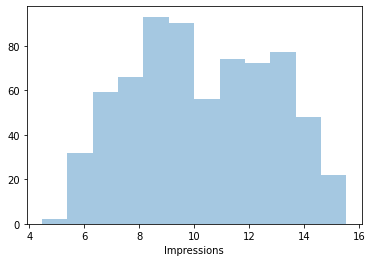

In [17]:
sns.distplot(df0.Impressions, kde = False)

In [22]:
df['CTR'] = df.Clicks/df.Impressions
df.sort_values('CTR', ascending = False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


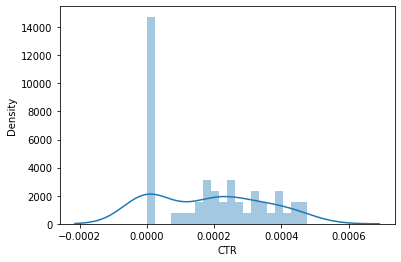

In [26]:
sns.distplot(df.query("xyz_campaign_id == 916").CTR, bins=20)

In [27]:
df['CPC'] = df.Spent/df.Clicks
df.sort_values('CPC', ascending = False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
586,1121223,1178,144558,30-34,M,31,64020,5,11.060000,1,0,0.000078,2.212000
548,1121129,1178,144537,30-34,M,21,20618,1,2.100000,2,1,0.000049,2.100000
686,1121413,1178,144592,35-39,M,64,65060,7,14.520000,1,1,0.000108,2.074286
588,1121229,1178,144561,30-34,M,32,404866,43,87.420001,4,0,0.000106,2.033023
549,1121131,1178,144537,30-34,M,21,83591,7,14.140000,2,2,0.000084,2.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1121477,1178,144603,40-44,M,21,7073,0,0.000000,1,0,0.000000,NaN
851,1121791,1178,144655,30-34,F,23,6838,0,0.000000,1,0,0.000000,NaN
880,1121846,1178,144664,30-34,F,32,8350,0,0.000000,1,0,0.000000,NaN
882,1121854,1178,144666,30-34,F,63,8587,0,0.000000,1,0,0.000000,NaN


In [28]:
scipy.stats.iqr(df.CPC,nan_policy='omit')

0.25436369905

In [29]:
df['CR'] = round(100*df.Approved_Conversion/df.Clicks, 2)
df.query("ad_id == '1121814'")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
